# HFE 2025 - Tasks 1-5

This notebook is ready for your HFE tasks.


# Task 1

In [13]:
pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 45.6 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip3.13 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import numpy as np
from scipy import stats

# Load the assessments file
assessments = pd.read_excel('../data/Assessments.xlsx')

# Display the data
print(" ASSESSMENTS DATA ")
print(assessments)
print("\n")

# Calculate descriptive statistics for Block Design scores
block_design_scores = assessments['Block Design Score']

# Calculate comprehensive stats
mean_score = block_design_scores.mean()
std_score = block_design_scores.std(ddof=1)  # ddof=1 for sample SD
median_score = block_design_scores.median()
mode_result = stats.mode(block_design_scores, keepdims=True)
mode_score = mode_result.mode[0]
mode_count = mode_result.count[0]
min_score = block_design_scores.min()
max_score = block_design_scores.max()
range_score = max_score - min_score
n = len(block_design_scores)
variance = block_design_scores.var(ddof=1)
skewness = block_design_scores.skew()
kurtosis = block_design_scores.kurtosis()

# Display results
print(" DESCRIPTIVE STATISTICS FOR BLOCK DESIGN SCORES ")
print(f"Sample Size (N): {n}")
print(f"Mean (M): {mean_score:.2f}")
print(f"Median (Mdn): {median_score:.2f}")
print(f"Mode: {mode_score} (appears {mode_count} times)")
print(f"Standard Deviation (SD): {std_score:.2f}")
print(f"Variance: {variance:.2f}")
print(f"Minimum: {min_score}")
print(f"Maximum: {max_score}")
print(f"Range: {range_score}")
print(f"Skewness: {skewness:.2f}")
print(f"Kurtosis: {kurtosis:.2f}")

 ASSESSMENTS DATA 
   TOPF\nSubject ID  Block Design Score
0              C008                  34
1              C009                  24
2              C013                  48
3              C016                  39
4              C017                  36
5              C021                  29
6              C024                  42
7              C025                  24
8              C032                  63
9              C033                  57
10             C037                  34
11             C040                  51
12             C041                  30


 DESCRIPTIVE STATISTICS FOR BLOCK DESIGN SCORES 
Sample Size (N): 13
Mean (M): 39.31
Median (Mdn): 36.00
Mode: 24 (appears 2 times)
Standard Deviation (SD): 12.32
Variance: 151.90
Minimum: 24
Maximum: 63
Range: 39
Skewness: 0.62
Kurtosis: -0.53


# Task 2

In [9]:
import os
from pathlib import Path

# Load assessments to get participant IDs
assessments = pd.read_excel('../data/Assessments.xlsx')

# Fix column names (remove any newline characters)
assessments.columns = assessments.columns.str.replace('\n', ' ')


# Get participant IDs - use the correct column name
participant_ids = assessments['TOPF Subject ID'].tolist()

# Dictionary to store completion times
completion_times = {}

# Set the data directory path
data_dir = Path('../data')

# Loop through each participant
for participant_id in participant_ids:
    # Build the full file path
    filename = data_dir / f'{participant_id}_SimpleStew_CompletedStepsData.csv'

    try:
        # Read the CSV file
        df = pd.read_csv(filename)

        # Get the first and last timestamps
        first_time = df['Session Time'].min()
        last_time = df['Session Time'].max()

        # Calculate total completion time (in seconds)
        total_time = last_time - first_time

        # Store the result
        completion_times[participant_id] = total_time



    except FileNotFoundError:
        print(f" File not found: {filename}")

# Add completion times to the assessments dataframe
assessments['Total Completion Time (seconds)'] = assessments['TOPF Subject ID'].map(completion_times)

print("\n=== UPDATED ASSESSMENTS WITH COMPLETION TIMES ===")
print(assessments)


=== UPDATED ASSESSMENTS WITH COMPLETION TIMES ===
   TOPF Subject ID  Block Design Score  Total Completion Time (seconds)
0             C008                  34                       303.678936
1             C009                  24                       319.561768
2             C013                  48                       397.384106
3             C016                  39                       176.589169
4             C017                  36                       257.510086
5             C021                  29                       359.111984
6             C024                  42                       176.902380
7             C025                  24                       299.278427
8             C032                  63                       189.060985
9             C033                  57                       309.952225
10            C037                  34                       357.691284
11            C040                  51                       233.624506
12           

# Task 3

In [10]:

# Extract the two variables
block_design = assessments['Block Design Score']
completion_time = assessments['Total Completion Time (seconds)']

# Conduct Spearman correlation
correlation_coefficient, p_value = stats.spearmanr(block_design, completion_time)

# Display results
print("=== SPEARMAN CORRELATION RESULTS ===")
print(f"Spearman's rho (rs): {correlation_coefficient:.3f}")
print(f"P-value: {p_value:.3f}")
print(f"Sample size (N): {len(assessments)}")

# Interpretation
if p_value < 0.05:
    print("\n Result is STATISTICALLY SIGNIFICANT (p < .05)")
else:
    print("\n Result is NOT statistically significant (p >= .05)")

if correlation_coefficient > 0:
    print("Direction: POSITIVE relationship (as one increases, the other increases)")
elif correlation_coefficient < 0:
    print("Direction: NEGATIVE relationship (as one increases, the other decreases)")

=== SPEARMAN CORRELATION RESULTS ===
Spearman's rho (rs): -0.358
P-value: 0.230
Sample size (N): 13

 Result is NOT statistically significant (p >= .05)
Direction: NEGATIVE relationship (as one increases, the other decreases)


# Task 4

Matplotlib is building the font cache; this may take a moment.


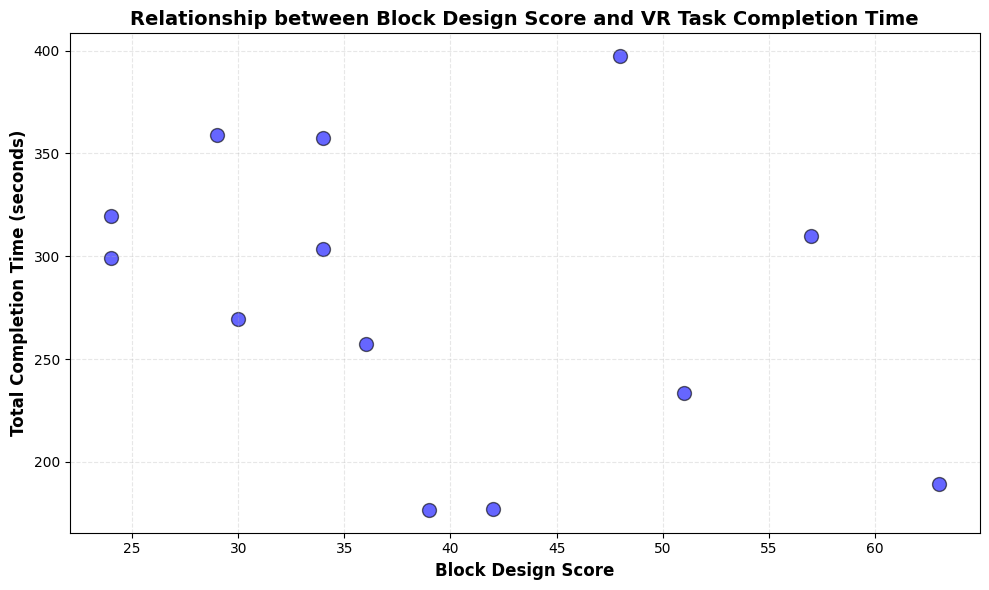

In [14]:
import matplotlib.pyplot as plt

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(assessments['Block Design Score'],
            assessments['Total Completion Time (seconds)'],
            color='blue',
            alpha=0.6,
            s=100,  # size of dots
            edgecolors='black')

# Add labels and title
plt.xlabel('Block Design Score', fontsize=12, fontweight='bold')
plt.ylabel('Total Completion Time (seconds)', fontsize=12, fontweight='bold')
plt.title('Relationship between Block Design Score and VR Task Completion Time',
          fontsize=14, fontweight='bold')

# Add grid for better readability
plt.grid(True, alpha=0.3, linestyle='--')

# Show the plot
plt.tight_layout()
plt.show()


# Task 5 & 6

=== LINEAR FIT RESULTS (TASK 5) ===
Slope: -1.907
Intercept: 355.733
R-squared: 0.107
Equation: y = -1.907x + 355.733



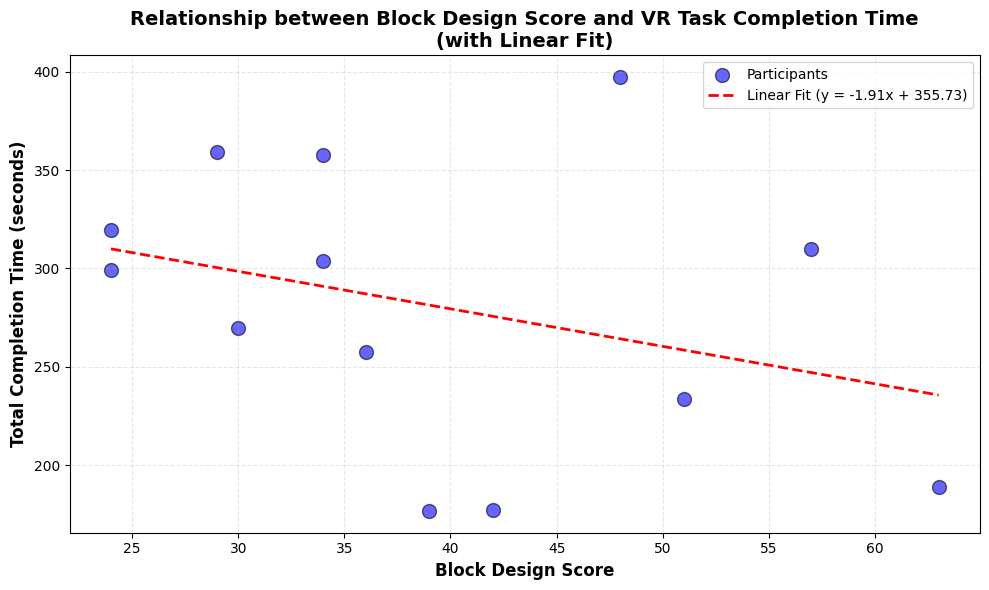

In [15]:
# Extract variables
x = assessments['Block Design Score']
y = assessments['Total Completion Time (seconds)']

# TASK 5: Calculate linear fit (best-fit line)
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Create predicted values for the line
x_line = np.linspace(x.min(), x.max(), 100)
y_line = slope * x_line + intercept

# Print linear fit results
print("=== LINEAR FIT RESULTS (TASK 5) ===")
print(f"Slope: {slope:.3f}")
print(f"Intercept: {intercept:.3f}")
print(f"R-squared: {r_value**2:.3f}")
print(f"Equation: y = {slope:.3f}x + {intercept:.3f}")
print()

# TASK 6: Create scatter plot WITH linear fit line
plt.figure(figsize=(10, 6))

# Scatter plot (the dots)
plt.scatter(x, y,
            color='blue',
            alpha=0.6,
            s=100,
            edgecolors='black',
            label='Participants')

# Linear fit line (the trend line)
plt.plot(x_line, y_line,
         color='red',
         linewidth=2,
         linestyle='--',
         label=f'Linear Fit (y = {slope:.2f}x + {intercept:.2f})')

# Labels and title
plt.xlabel('Block Design Score', fontsize=12, fontweight='bold')
plt.ylabel('Total Completion Time (seconds)', fontsize=12, fontweight='bold')
plt.title('Relationship between Block Design Score and VR Task Completion Time\n(with Linear Fit)',
          fontsize=14, fontweight='bold')

# Add legend
plt.legend(loc='best', fontsize=10)

# Grid
plt.grid(True, alpha=0.3, linestyle='--')

# Show plot
plt.tight_layout()
plt.show()

### Implications
The linear trend suggests a negative relationship between Block Design scores and total completion time, indicating that participants with higher cognitive scores tended to complete the VR task faster. However, since the correlation was not statistically significant, this pattern should be interpreted cautiously.


# TASK 8

In [24]:
import pandas as pd
from pathlib import Path

# Resolve data directory from project root or /notebooks
DATA_DIR = Path("./data") if Path("./data").exists() else Path("../data")

rows = []
files = sorted(DATA_DIR.glob("*_CompletedStepsData.csv"))

for f in files:
    df = pd.read_csv(f, header=None, names=["Session Time", "Completed Step"])
    t = pd.to_numeric(df["Session Time"], errors="coerce").dropna()
    if len(t) < 2:
        continue
    total_time_sec = t.max() - t.min()
    steps_unique = df["Completed Step"].dropna().nunique()
    if total_time_sec <= 0 or steps_unique == 0:
        continue
    spm = steps_unique / (total_time_sec / 60.0)
    rows.append({"ParticipantID": f.name.split("_")[0], "StepsPerMinute": spm})

efficiency_data = pd.DataFrame(rows).sort_values("ParticipantID").reset_index(drop=True)

Path("reports").mkdir(exist_ok=True)
efficiency_data.to_csv("reports/efficiency_spm.csv", index=False)
efficiency_data.head(10)


,ParticipantID,StepsPerMinute
0,C008,1.975771
1,C009,1.689814
2,C013,1.207899
3,C016,3.397717
4,C017,2.330006
5,C021,1.670788
6,C024,3.391701
7,C025,2.004822
8,C032,3.173579
9,C033,1.935782


# TASK 9

Spearman (Block Design vs Steps/Minute)
rho = 0.358, p = 0.230, N = 13
Direction: Positive


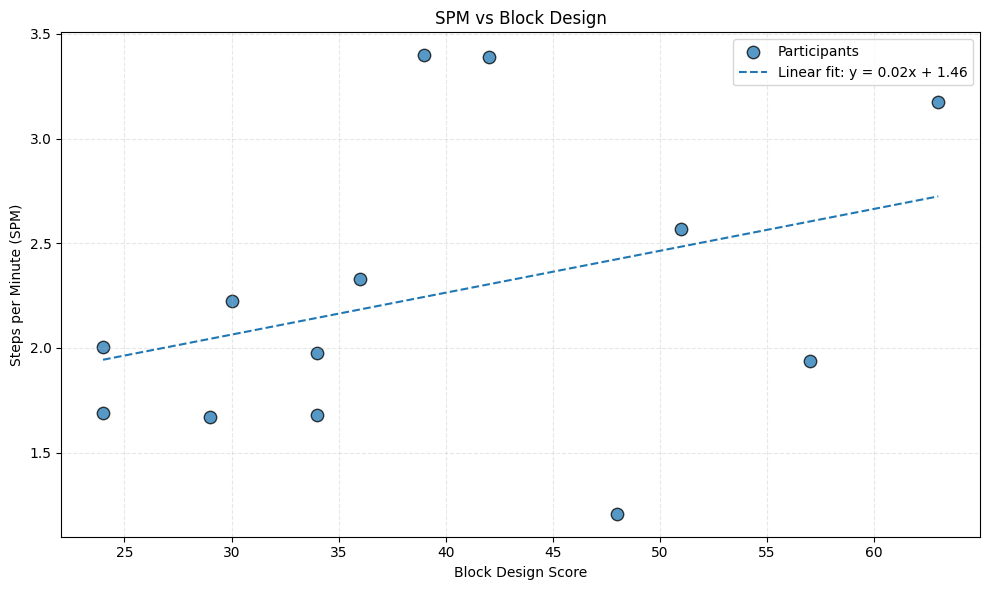

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

eff_aligned = efficiency_data.rename(columns={"ParticipantID": "TOPF Subject ID"})

# Merge and drop missing
df = (assessments[["TOPF Subject ID", "Block Design Score"]]
      .merge(eff_aligned[["TOPF Subject ID", "StepsPerMinute"]],
             on="TOPF Subject ID", how="inner")
      .dropna(subset=["Block Design Score", "StepsPerMinute"]))

# Extract arrays
x = df["Block Design Score"].to_numpy()
y = df["StepsPerMinute"].to_numpy()
n = len(df)

# Spearman correlation
rho, p = spearmanr(x, y, nan_policy="omit")
direction = "Positive" if rho > 0 else "Negative"

print("Spearman (Block Design vs Steps/Minute)")
print(f"rho = {rho:.3f}, p = {p:.3f}, N = {n}")
print(f"Direction: {direction}")

# Linear fit (for visualization)
slope, intercept = np.polyfit(x, y, 1)
x_line = np.linspace(x.min(), x.max(), 100)
y_line = slope * x_line + intercept

# Plot
plt.figure(figsize=(10,6))
plt.scatter(x, y, s=80, edgecolors="black", alpha=0.75, label="Participants")
plt.plot(x_line, y_line, "--", label=f"Linear fit: y = {slope:.2f}x + {intercept:.2f}")
plt.xlabel("Block Design Score")
plt.ylabel("Steps per Minute (SPM)")
plt.title("SPM vs Block Design")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()
